## Trabajo Práctico 2: Redes Neuronales

### Imports iniciales

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

RANDOM_STATE = 19 * 103785
tf.random.set_seed(RANDOM_STATE)

from tensorflow.keras import regularizers
physical_devices = tf.config.list_physical_devices('GPU')

try:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
    pass

from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense,Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [13]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay, roc_curve
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer

## Redes neuronales

Los parámetros que tendremos en cuenta al entrenar las redes neuronales seran:

+ Función de costo: Una forma para que la red entiende si predijo correctamente, en este caso como buscamos una clasificacion binaria utilizaremos binary cross entropy.
+ Optimizador: Es el algoritmo mediante el cual se optimiza el función de costo. En este caso probaremos los distintos optimizadores que nos probee keras: SGD, Adam, Adadelta, etc...
+ Tasa de aprendizaje: Es un parámetro que indica la velocidad con la cual el optimizador intenta acercarse el mínimo de la función de pérdida.
+ Funcion de activacion de las neuronas: Se aplica sobre el input de cada neurona, antes de multiplicarla por el peso correspondiente (El famoso pegamento no lineal).
+ Cantidad de capas y neuronas

In [14]:
from preprocesamiento import feature_engineering
from preprocesamiento import obtenerDFTraining
from preprocesamiento import preprocesar_data_frame
from preprocesamiento import prepros_dummies
from preprocesamiento import preprocesar_normalize_scaler
from preprocesamiento import metricas
from preprocesamiento import obtenerDFHoldout

### Plots Auxiliares

In [15]:
def plot_roc_auc_redes(X_test, y_test, modelo):
    fig, ax = plt.subplots(dpi=100, figsize=(8, 4))
    plt.grid(False)

    fpr, tpr, thresholds = roc_curve(y_test, modelo.predict(X_test))
    auc = roc_auc_score(y_test, modelo.predict(X_test))

    r = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc)
    r.plot(ax=ax)

    plt.show()

def plot_matriz_de_confusion_redes(X_test, y_test, modelo):
    fig, ax = plt.subplots(dpi=100, figsize=(8, 4))
    plt.grid(False)
    c = ConfusionMatrixDisplay(confusion_matrix(y_test, modelo.predict(X_test)>0.5))
    c.plot(cmap=sns.color_palette("rocket", as_cmap=True), ax=ax)
    plt.show()

def plot_loss(history):
    plt.figure(dpi=100, figsize=(8, 4))
    plt.plot(history['loss'], label="loss")
    plt.plot(history['val_loss'], label="validation loss")
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend()
    plt.show() 
    
def plot_acc(history):
    plt.figure(dpi=100, figsize=(8, 4))
    plt.plot(history['accuracy'], label="accuracy")
    plt.plot(history['val_accuracy'], label="validation accuracy")
    plt.title('model accuracy')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend()
    plt.show()

## ¿Como probaremos nuestras redes?

Para poder analizar la evolución de nuestras redes utilizaremos dos gráficos, uno que nos muestra el valor de las función de loss y otro el accuracy en función de las epochs. En ambos gráficos podremos ver las curvas sobre el set de entrenamiento y validación. 

Deberíamos notar que ambas curvas evolucionan de la misma manera, preferentemente notando que la curva del set de validación evoluciona un poco mejor que el de entrenamiento, esto nos indica que nuestro modelo está generalizando correctamente.

Para decidir cuántas epochs debemos entrenar nuestras redes, podemos observar el gráfico de accuracy. A partir de una cierta cantidad de epochs notaremos que el valor de accuracy comienza a ser constante y luego la curva del set de entrenamiento comenzará a subir mientras que la del set de validación comenzará a bajar, indicándonos que la red neuronal ha comenzado a memorizar el set de entrenamiento.

También nos ayudan a poder notar si es necesario aumentar la regularización a la hora del entrenamiento si vemos que las curvas están muy separadas.

## Primer modelo: Una capa oculta

In [5]:
df = obtenerDFTraining()
(X,y) = preprocesar_data_frame(df)
X_prepos = prepros_dummies(X[['ganancia_perdida_declarada_bolsa_argentina','trabajo','horas_trabajo_registradas',
                                      'estado_marital','edad','genero','anios_estudiados','horas_trabajo_registradas']])
X_prepos = preprocesar_normalize_scaler(X_prepos)
x_train, x_test, y_train, y_test = train_test_split(X_prepos, y, test_size=0.25, random_state=RANDOM_STATE)

Inicialmente probaremos con una unica capa oculta e iremos complejizando la red poco a poco

In [6]:
model1 = Sequential()
model1.add(Dense(80, activation='relu',input_shape=(25,)))
model1.add(Dropout(0.5))
model1.add(Dense(1, activation='sigmoid'))
opt = keras.optimizers.Adam(learning_rate=0.001)
model1.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

model1.summary()

h = model1.fit(x_train, y_train, epochs=1200,batch_size=50, verbose=4, validation_split=0.3)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 80)                2080      
_________________________________________________________________
dropout (Dropout)            (None, 80)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 81        
Total params: 2,161
Trainable params: 2,161
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1200
Epoch 2/1200
Epoch 3/1200
Epoch 4/1200
Epoch 5/1200
Epoch 6/1200
Epoch 7/1200
Epoch 8/1200
Epoch 9/1200
Epoch 10/1200
Epoch 11/1200
Epoch 12/1200
Epoch 13/1200
Epoch 14/1200
Epoch 15/1200
Epoch 16/1200
Epoch 17/1200
Epoch 18/1200
Epoch 19/1200
Epoch 20/1200
Epoch 21/1200
Epoch 22/1200
Epoch 23/1200
Epoch 24/1200
Epoch 25/1200
Epoch 26/1200
Epoch 27/1200
Epoch 28/1200
E

#### Metricas

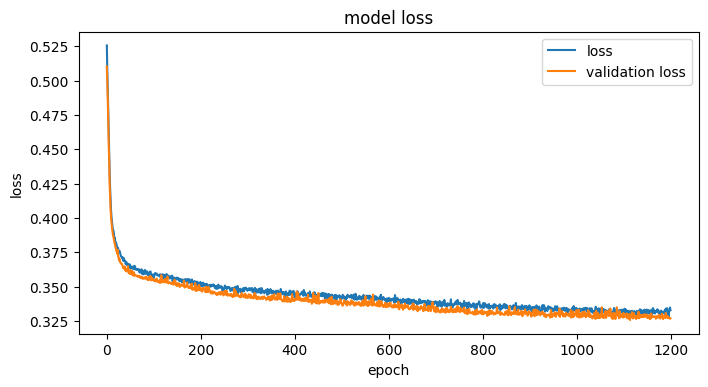

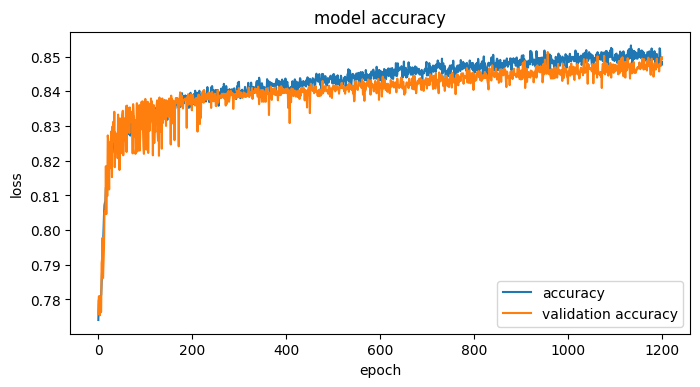

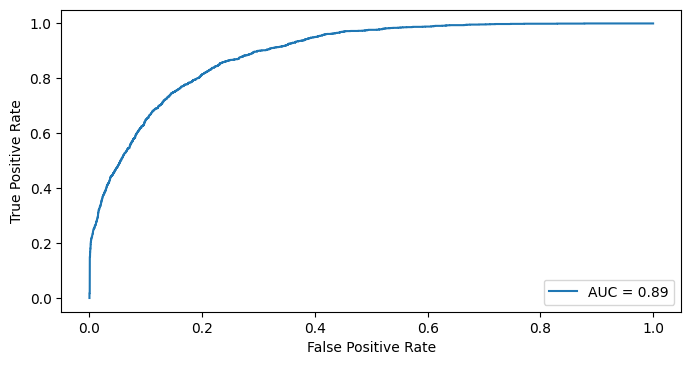

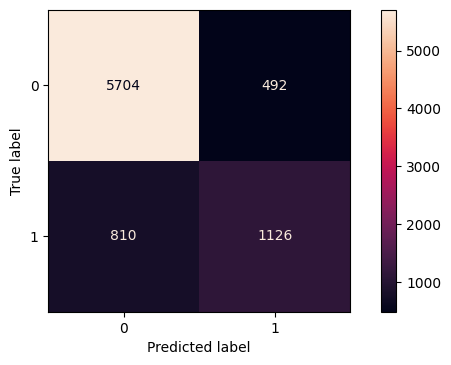

              precision    recall  f1-score   support

           0     0.8757    0.9206    0.8976      6196
           1     0.6959    0.5816    0.6337      1936

    accuracy                         0.8399      8132
   macro avg     0.7858    0.7511    0.7656      8132
weighted avg     0.8329    0.8399    0.8347      8132



/home/santi/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [7]:
plot_loss(h.history)
plot_acc(h.history)
plot_roc_auc_redes(x_test, y_test, model1)
plot_matriz_de_confusion_redes(x_test, y_test, model1)
print(classification_report(y_test, model1.predict_classes(x_test),digits= 4))

## Segundo Modelo: Probando otro Optimizador

In [8]:
model2 = Sequential()
model2.add(Dense(80, activation='relu',input_shape=(25,)))
model2.add(Dropout(0.5))
model2.add(Dense(1, activation='sigmoid'))
opt = keras.optimizers.SGD(learning_rate=0.001)
model2.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

model2.summary()

h = model2.fit(x_train, y_train, epochs=1200,batch_size=1000, verbose=0, validation_split=0.3)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 80)                2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 80)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 81        
Total params: 2,161
Trainable params: 2,161
Non-trainable params: 0
_________________________________________________________________


#### Metricas

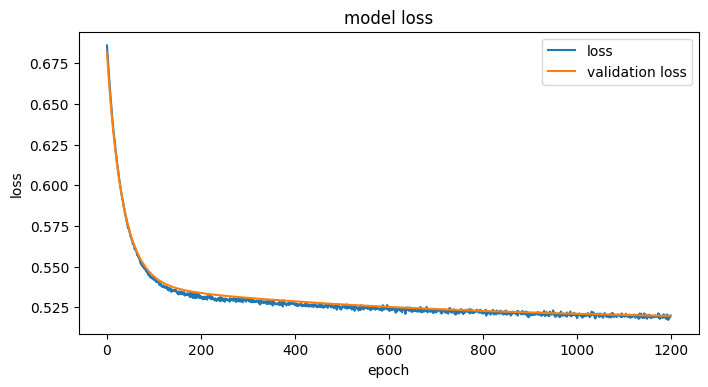

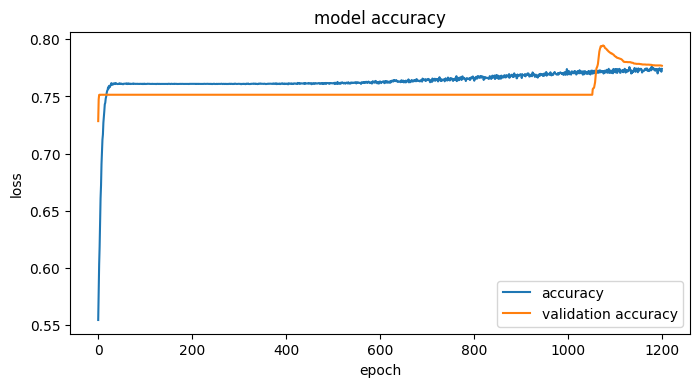

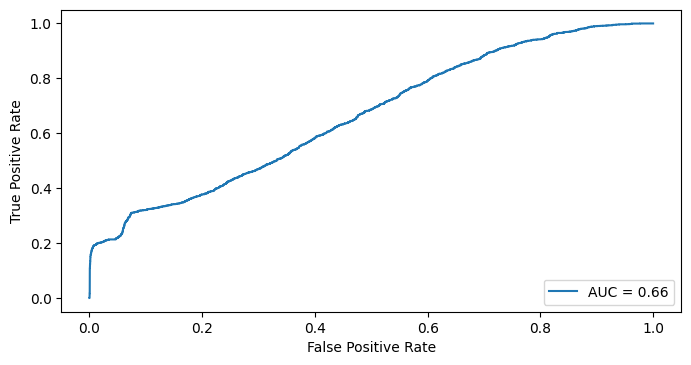

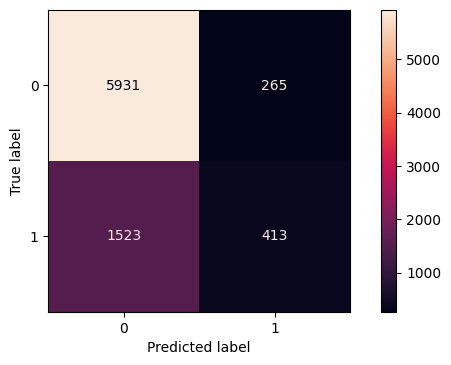

              precision    recall  f1-score   support

           0     0.7957    0.9572    0.8690      6196
           1     0.6091    0.2133    0.3160      1936

    accuracy                         0.7801      8132
   macro avg     0.7024    0.5853    0.5925      8132
weighted avg     0.7513    0.7801    0.7374      8132



/home/santi/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [9]:
plot_loss(h.history)
plot_acc(h.history)
plot_roc_auc_redes(x_test, y_test, model2)
plot_matriz_de_confusion_redes(x_test, y_test, model2)
print(classification_report(y_test, model2.predict_classes(x_test),digits= 4))

## Tercer modelo: El retorno de una nueva capa

In [10]:
model3 = Sequential()
model3.add(Dense(80, activation='relu',input_shape=(25,)))
model3.add(Dropout(0.5))
model3.add(Dense(10, activation='relu'))
model3.add(Dropout(0.25))
model3.add(Dense(1, activation='sigmoid'))
opt = keras.optimizers.Adam(learning_rate=0.001)
model3.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

model3.summary()

h = model3.fit(x_train, y_train, epochs=3000,batch_size=1000, verbose=0, validation_split=0.3)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 80)                2080      
_________________________________________________________________
dropout_2 (Dropout)          (None, 80)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                810       
_________________________________________________________________
dropout_3 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 11        
Total params: 2,901
Trainable params: 2,901
Non-trainable params: 0
_________________________________________________________________


#### Metricas

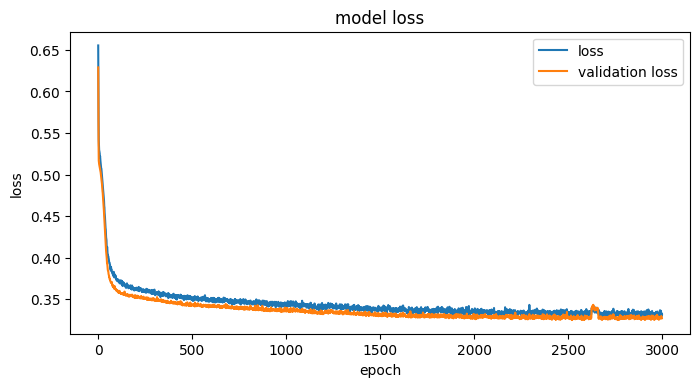

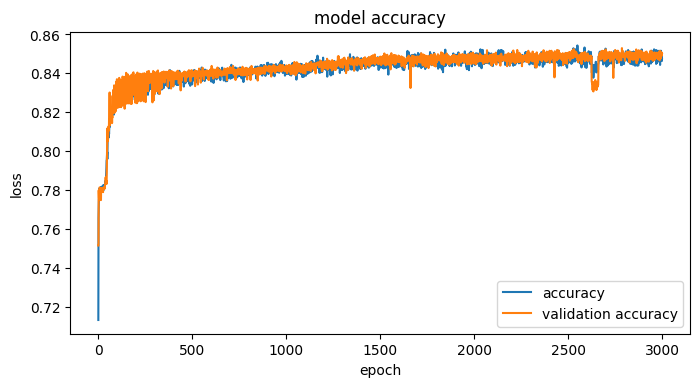

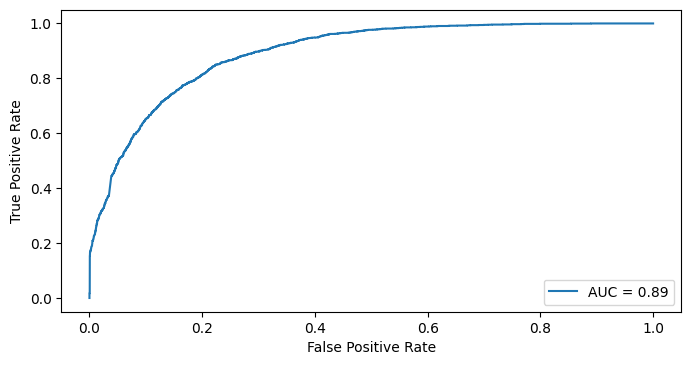

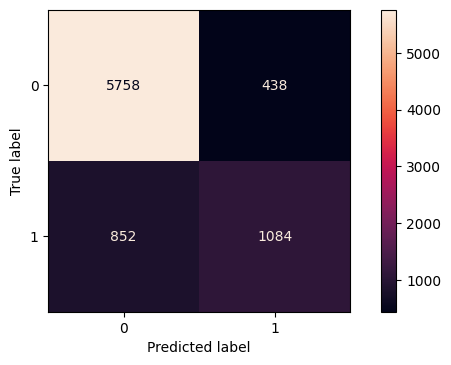

              precision    recall  f1-score   support

           0     0.8711    0.9293    0.8993      6196
           1     0.7122    0.5599    0.6270      1936

    accuracy                         0.8414      8132
   macro avg     0.7917    0.7446    0.7631      8132
weighted avg     0.8333    0.8414    0.8344      8132



/home/santi/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [11]:
plot_loss(h.history)
plot_acc(h.history)
plot_roc_auc_redes(x_test, y_test, model3)
plot_matriz_de_confusion_redes(x_test, y_test, model3)
print(classification_report(y_test,model3.predict_classes(x_test),digits= 4))

## Cuarto Modelo: Utilizando optimizador Adagrad

In [12]:
model4 = Sequential()
model4.add(Dense(80, activation='relu',input_shape=(25,)))
model4.add(Dropout(0.5))
model4.add(Dense(10, activation='relu'))
model4.add(Dropout(0.25))
model4.add(Dense(1, activation='sigmoid'))
opt = keras.optimizers.Adagrad(learning_rate=0.001)
model4.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

model4.summary()

h = model4.fit(x_train, y_train, epochs=3000,batch_size=1000, verbose=0, validation_split=0.3)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 80)                2080      
_________________________________________________________________
dropout_4 (Dropout)          (None, 80)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                810       
_________________________________________________________________
dropout_5 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 11        
Total params: 2,901
Trainable params: 2,901
Non-trainable params: 0
_________________________________________________________________


#### Metricas

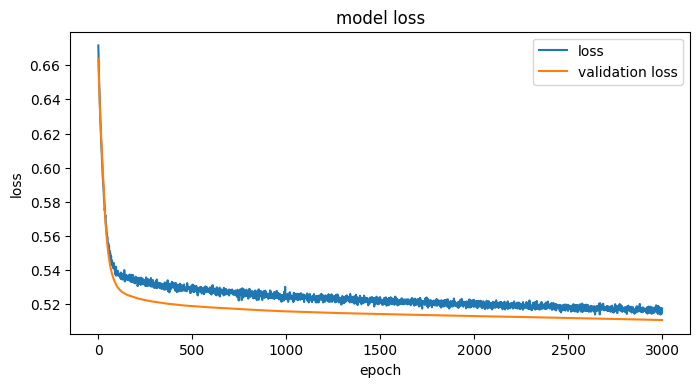

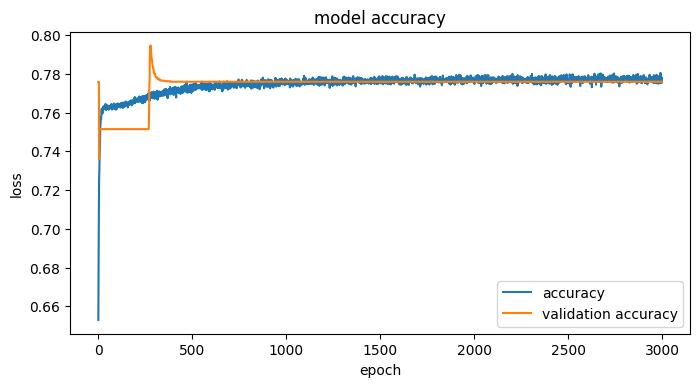

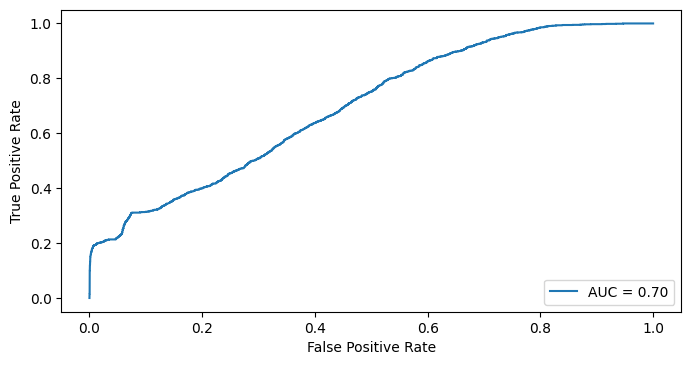

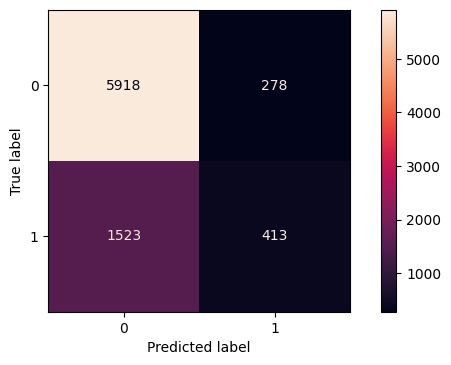

              precision    recall  f1-score   support

           0     0.7953    0.9551    0.8679      6196
           1     0.5977    0.2133    0.3144      1936

    accuracy                         0.7785      8132
   macro avg     0.6965    0.5842    0.5912      8132
weighted avg     0.7483    0.7785    0.7362      8132



/home/santi/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [13]:
plot_loss(h.history)
plot_acc(h.history)
plot_roc_auc_redes(x_test, y_test, model4)
plot_matriz_de_confusion_redes(x_test, y_test, model4)
print(classification_report(y_test,model4.predict_classes(x_test),digits= 4))

## Quinto Modelo: Volviendo a Adam y Agregando una capa

In [14]:
model5 = Sequential()
model5.add(Dense(80, activation='relu',input_shape=(25,)))
model5.add(Dropout(0.5))
model5.add(Dense(40, activation='relu'))
model5.add(Dropout(0.5))
model5.add(Dense(5, activation='relu'))
model5.add(Dropout(0.25))
model5.add(Dense(1, activation='sigmoid'))
opt = keras.optimizers.Adam(learning_rate=0.001)
model5.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

model5.summary()

h = model5.fit(x_train, y_train, epochs=4000,batch_size=1000, verbose=0, validation_split=0.3)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 80)                2080      
_________________________________________________________________
dropout_6 (Dropout)          (None, 80)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 40)                3240      
_________________________________________________________________
dropout_7 (Dropout)          (None, 40)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 5)                 205       
_________________________________________________________________
dropout_8 (Dropout)          (None, 5)                 0         
_________________________________________________________________
dense_13 (Dense)             (None, 1)                

#### Metricas

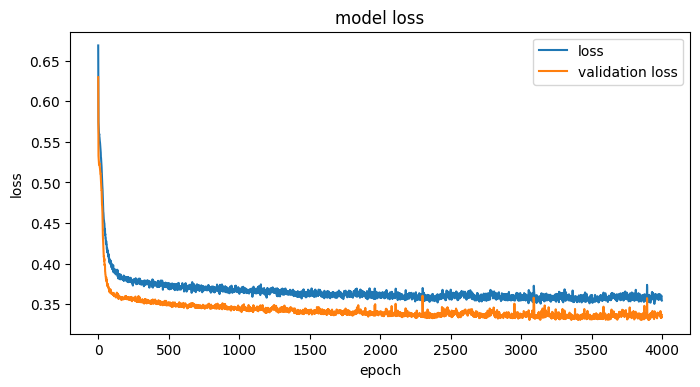

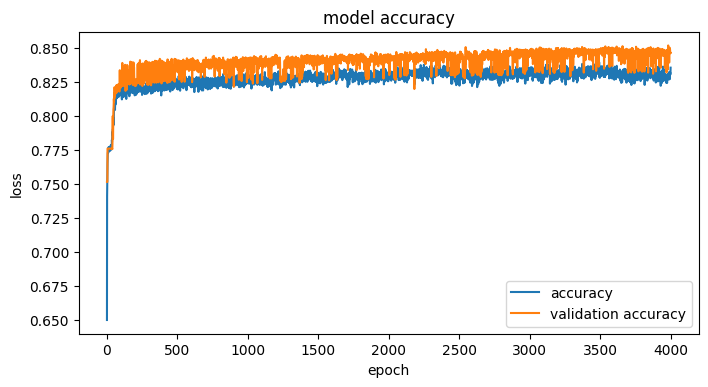

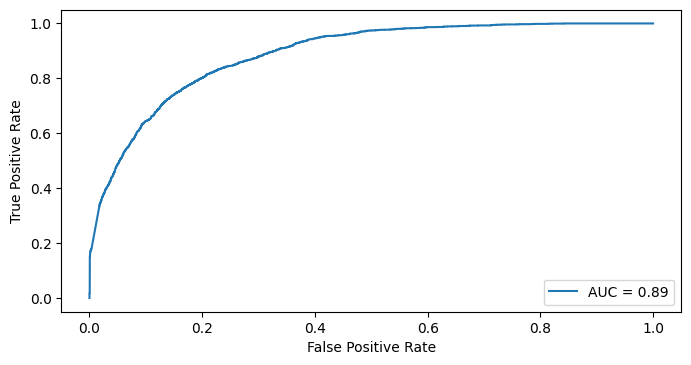

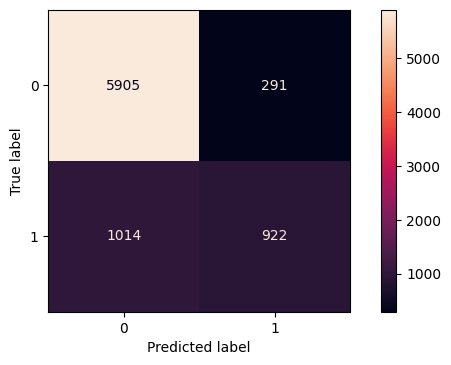

              precision    recall  f1-score   support

           0     0.8534    0.9530    0.9005      6196
           1     0.7601    0.4762    0.5856      1936

    accuracy                         0.8395      8132
   macro avg     0.8068    0.7146    0.7430      8132
weighted avg     0.8312    0.8395    0.8255      8132



/home/santi/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [15]:
plot_loss(h.history)
plot_acc(h.history)
plot_roc_auc_redes(x_test, y_test, model5)
plot_matriz_de_confusion_redes(x_test, y_test, model5)
print(classification_report(y_test,model5.predict_classes(x_test),digits= 4))

### Otro preprocesamiento: MinMAX scaler y PCA

In [27]:
from preprocesamiento import preprocesar_df_min_max_scaler
from preprocesamiento import preprocesar_df_pca

df = obtenerDFTraining()
(X,y) = preprocesar_data_frame(df)
X_prepos = prepros_dummies(X[['ganancia_perdida_declarada_bolsa_argentina','trabajo','horas_trabajo_registradas',
                                      'estado_marital','edad','genero','anios_estudiados','horas_trabajo_registradas']])
X_prepos = preprocesar_df_min_max_scaler(X_prepos)
X_prepos = preprocesar_df_pca(X_prepos, 18)
x_train, x_test, y_train, y_test = train_test_split(X_prepos, y, test_size=0.25, random_state=RANDOM_STATE)

### Primer modelo: Una capa oculta

In [28]:
model6 = Sequential()
model6.add(Dense(50, activation='relu',input_shape=(18,)))
model6.add(Dropout(0.7))
model6.add(Dense(1, activation='sigmoid'))
opt = keras.optimizers.Adam(learning_rate=0.001)
model6.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

model6.summary()

h = model6.fit(x_train, y_train, epochs=800,batch_size=50, verbose=4, validation_split=0.3)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 50)                950       
_________________________________________________________________
dropout_9 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 51        
Total params: 1,001
Trainable params: 1,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/800
Epoch 2/800
Epoch 3/800
Epoch 4/800
Epoch 5/800
Epoch 6/800
Epoch 7/800
Epoch 8/800
Epoch 9/800
Epoch 10/800
Epoch 11/800
Epoch 12/800
Epoch 13/800
Epoch 14/800
Epoch 15/800
Epoch 16/800
Epoch 17/800
Epoch 18/800
Epoch 19/800
Epoch 20/800
Epoch 21/800
Epoch 22/800
Epoch 23/800
Epoch 24/800
Epoch 25/800
Epoch 26/800
Epoch 27/800
Epoch 28/800
Epoch 29/800
Epoch 30/800
E

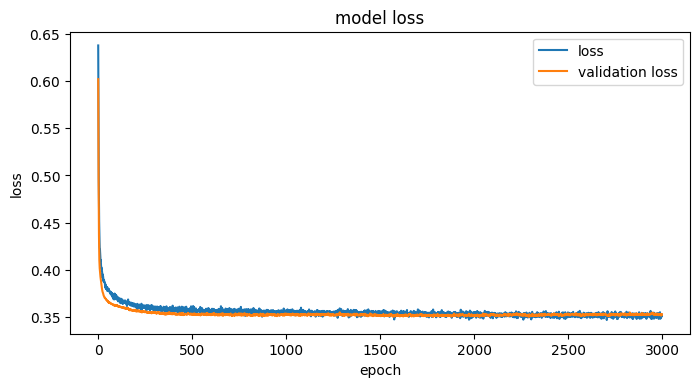

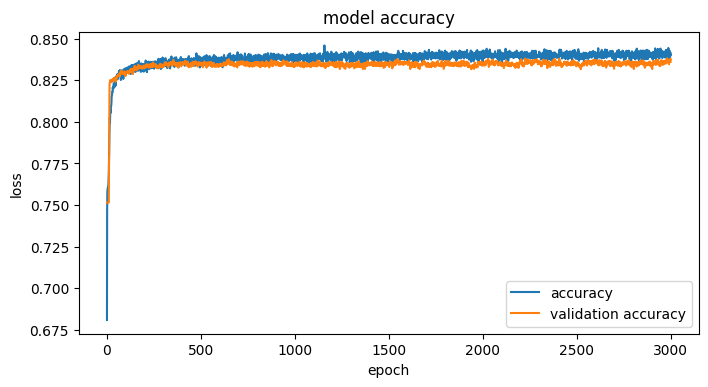

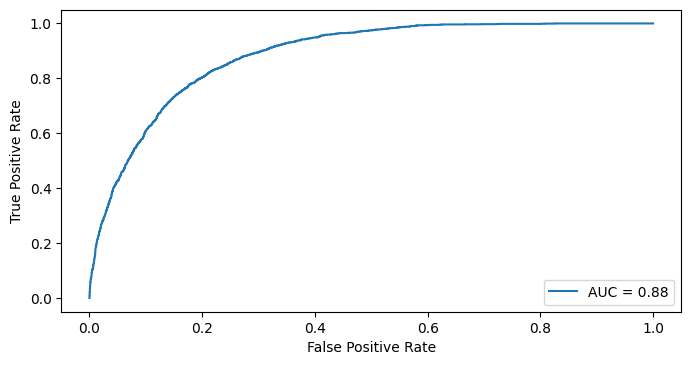

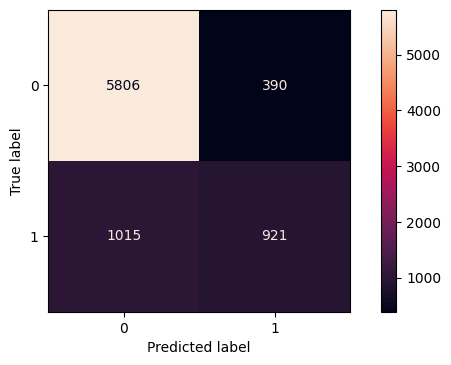

/home/mauricio/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

           0     0.8512    0.9371    0.8921      6196
           1     0.7025    0.4757    0.5673      1936

    accuracy                         0.8272      8132
   macro avg     0.7769    0.7064    0.7297      8132
weighted avg     0.8158    0.8272    0.8147      8132



In [32]:
plot_loss(h.history)
plot_acc(h.history)
plot_roc_auc_redes(x_test, y_test, model6)
plot_matriz_de_confusion_redes(x_test, y_test, model6)
print(classification_report(y_test, model6.predict_classes(x_test),digits= 4))

In [34]:
model7 = Sequential()
model7.add(Dense(50, activation='relu',input_shape=(18,)))
model7.add(Dropout(0.5))
model7.add(Dense(5, activation='relu'))
model7.add(Dropout(0.25))
model7.add(Dense(1, activation='sigmoid'))
opt = keras.optimizers.Adam(learning_rate=0.001)
model7.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

model7.summary()

h = model7.fit(x_train, y_train, epochs=800,batch_size=1000, verbose=0, validation_split=0.3)

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 50)                950       
_________________________________________________________________
dropout_12 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_24 (Dense)             (None, 5)                 255       
_________________________________________________________________
dropout_13 (Dropout)         (None, 5)                 0         
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 6         
Total params: 1,211
Trainable params: 1,211
Non-trainable params: 0
_________________________________________________________________


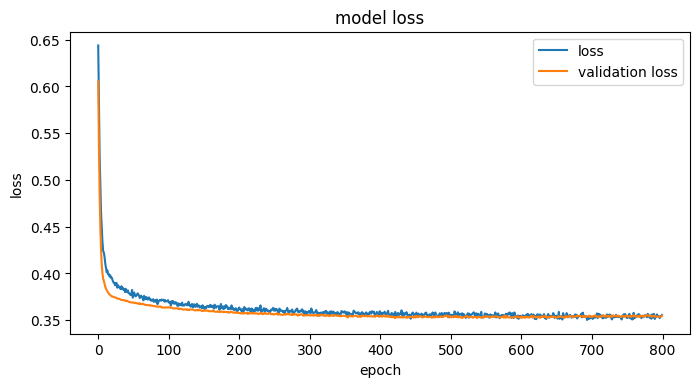

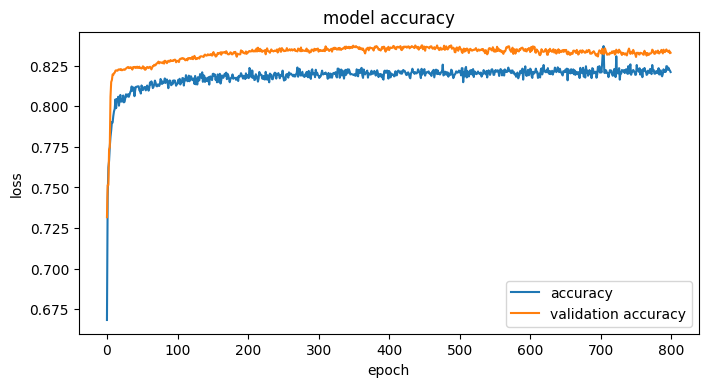

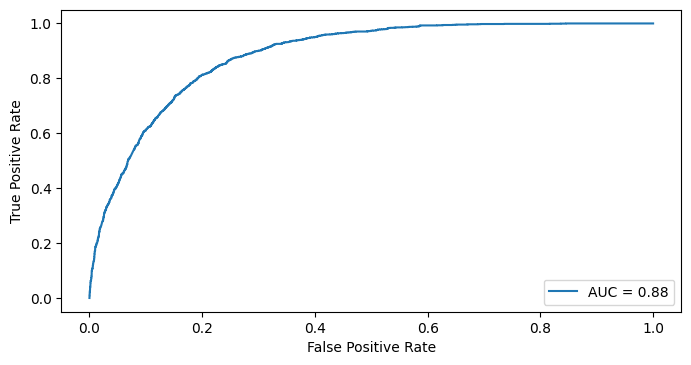

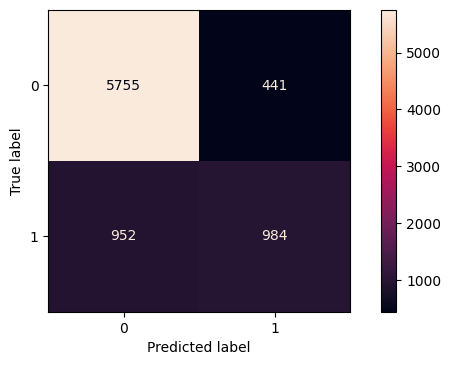

/home/mauricio/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

           0     0.8581    0.9288    0.8920      6196
           1     0.6905    0.5083    0.5855      1936

    accuracy                         0.8287      8132
   macro avg     0.7743    0.7185    0.7388      8132
weighted avg     0.8182    0.8287    0.8191      8132



In [35]:
plot_loss(h.history)
plot_acc(h.history)
plot_roc_auc_redes(x_test, y_test, model7)
plot_matriz_de_confusion_redes(x_test, y_test, model7)
print(classification_report(y_test, model7.predict_classes(x_test),digits= 4))

### Prediccion sobre el Holdout

In [17]:
from preprocesamiento import obtenerDFHoldout
from preprocesamiento import escribir_predicciones_a_archivo

holdout = obtenerDFHoldout()

ids = np.array(holdout['id'])

holdout = prepros_dummies(holdout[['ganancia_perdida_declarada_bolsa_argentina','trabajo','horas_trabajo_registradas',
                                      'estado_marital','edad','genero','anios_estudiados','horas_trabajo_registradas']])
holdout = preprocesar_normalize_scaler(holdout)

predicciones_holdout = model1.predict_classes(holdout).flatten()
escribir_predicciones_a_archivo(predicciones_holdout,"Red Neuronal",ids)

/home/santi/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
